In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import astropy
from astropy import units as u
from astropy.cosmology import WMAP5
from scipy.optimize import curve_fit
import scipy.optimize as fit
from astropy.table import Table
from functools import reduce
from sklearn.model_selection import train_test_split
%matplotlib inline

#All PN csv's
PN_fg, PN_Al, PN_Ap, PN_BL, PN_Cn, PN_H, PN_M, PN_K = pd.read_csv('/work/PNfg.csv'), pd.read_csv('/work/PN_Al_simbad.csv'), pd.read_csv('/work/PN_Ap_simbad.csv'), pd.read_csv('/work/PN_BL_simbad.csv'), pd.read_csv('/work/PN_Cn_simbad.csv'), pd.read_csv('/work/PN_H_simbad.csv'), pd.read_csv('/work/PN_M_simbad.csv'), pd.read_csv('/work/PN_K_simbad.csv')
csv_array = [PN_fg, PN_Al, PN_Ap, PN_BL, PN_Cn, PN_H, PN_M, PN_K]

In [ ]:
#Cleaning each through loop and adding to massive df
all_PN = pd.DataFrame()
for i in csv_array:
    clean_Duplicate = i.drop(columns = [i.columns[0]]).rename(columns = {'Unnamed: 1' : 'Object Type Identifier', 'Unnamed: 2': 'Typed Identifier', 'Unnamed: 3' : 'Identifier', 'Unnamed: 4' : 'coord1 (ICRS,J2000/2000)', 'Unnamed: 5' : 'coord3 (FK4,B1950/1950)', 'Unnamed: 6' : 'coord4 (Gal,J2000/2000)', 'Unnamed: 7' : 'Proper Motions mas/yr', 'Unnamed: 8' : 'Radial Velocity', 'Unnamed: 9' : 'Redshift', 'Unnamed: 10' : 'CZ', 'Unnamed: 11' : '# of Notes'})
    clean_Duplicate.drop(clean_Duplicate.index[:8], inplace = True)
    clean_Duplicate = clean_Duplicate.dropna().reset_index().drop(columns = ['index'])
    df_array = [all_PN, clean_Duplicate]
    all_PN = pd.concat(df_array)
all_PN


,Object Type Identifier,Typed Identifier,Identifier,"coord1 (ICRS,J2000/2000)","coord3 (FK4,B1950/1950)","coord4 (Gal,J2000/2000)",Proper Motions mas/yr,Radial Velocity,Redshift,CZ,# of Notes
0,PN fg,PN Fg 1,PN,11 28 36.2243510088 -52 56 04.118494344,11 26 15.0187212508 -52 39 32.065888782,290.5052808408019 +07.9270656250242,-12.977 6.605,28.0,0.000093,28.00,0
1,PN fg,PN Fg 2,PN,17 39 19.86 -44 09 37.5,17 35 41.53 -44 07 59.2,346.33683 -06.89722,~ ~,17,0.000057,17.00,0
2,PN fg,PN Fg 3,PN,18 00 11.8162949280 -38 49 52.619928204,17 56 44.2567396974 -38 49 45.780400639,352.9575541847812 -07.5964762824155,-1.715 -1.938,0,0.000000,0.00,1
0,PN Al,PN Al 1,PN,18 34 55.2533574888 -27 06 19.081866528,18 31 47.6150510798 -27 08 44.107225366,006.8437647968122 -08.6681873185317,-3.678 -6.721,72,0.000240,72.01,0
1,PN Al,PN Th 3-15,PN,17 27 10.6020826176 -27 43 58.817283348,17 24 02.1156716633 -27 41 28.923322997,358.8319711706535 +04.0685462533677,~ ~,33,0.000110,33.00,0
...,...,...,...,...,...,...,...,...,...,...,...
281,PN K,PN K 6-38,PN,17 59 59.10 -32 35 57.8,17 56 42.59 -32 35 50.5,358.40648 -04.51659,~ ~,~,~,~,0
282,PN K,PN K 6-39,PN,18 03 05.0893512144 -27 46 44.260249764,17 59 56.1072353042 -27 46 50.839903395,002.9423351816524 -02.7292633018744,~ ~,~,~,~,1
283,PN K,PN G002.2-04.3,PN,18 08 06.42 -29 13 15.7,18 04 55.27 -29 13 44.2,002.21687 -04.39440,~ ~,~,~,~,1
284,PN K,PN K 6-41,PN,18 11 12.37 -29 22 04.5,18 08 01.01 -29 22 46.5,002.41169 -05.05807,~ ~,~,~,~,1


In [ ]:
clean_all_PN = all_PN
clean_all_PN['Identifier'] = clean_all_PN['Identifier'].astype('string')
clean_all_PN['Proper Motions mas/yr'] = clean_all_PN['Proper Motions mas/yr'].astype('string')
clean_all_PN['Redshift'] = clean_all_PN['Redshift'].astype('string')
clean_all_PN['# of Notes'] = clean_all_PN['# of Notes'].astype('string')
clean_all_PN = clean_all_PN[(clean_all_PN['Identifier'] == 'PN ') & (clean_all_PN['Proper Motions mas/yr'] != '            ~ ~ ') & (clean_all_PN['Redshift'] != '~           ') & (clean_all_PN['# of Notes'] == '0')].reset_index().drop(columns = ['index'])
clean_all_PN

,Object Type Identifier,Typed Identifier,Identifier,"coord1 (ICRS,J2000/2000)","coord3 (FK4,B1950/1950)","coord4 (Gal,J2000/2000)",Proper Motions mas/yr,Radial Velocity,Redshift,CZ,# of Notes
0,PN fg,PN Fg 1,PN,11 28 36.2243510088 -52 56 04.118494344,11 26 15.0187212508 -52 39 32.065888782,290.5052808408019 +07.9270656250242,-12.977 6.605,28.0,0.000093,28.00,0
1,PN Al,PN Al 1,PN,18 34 55.2533574888 -27 06 19.081866528,18 31 47.6150510798 -27 08 44.107225366,006.8437647968122 -08.6681873185317,-3.678 -6.721,72,0.000240,72.01,0
2,PN Al,PN Al 2-B,PN,17 27 47.1296613240 -28 11 03.395600016,17 24 37.9803138212 -28 08 35.880665597,358.5298410120947 +03.7068060390411,-4.835 -4.603,-168,-0.000560,-167.95,0
3,PN Ap,EM* AS 283,PN,18 11 35.1005488652 -28 22 36.727284875,18 08 25.2658144104 -28 23 20.214447120,003.3261570438017 -04.6595678195713,-4.617 -4.522,157,0.000524,157.04,0
4,PN Cn,HD 330036,PN,15 51 15.9290064932 -48 44 58.559111355,15 47 38.1639294930 -48 35 57.772328270,330.7786262009003 +04.1534529373272,-1.478 -1.517,-12.00,-0.000040,-12.00,0
...,...,...,...,...,...,...,...,...,...,...,...
75,PN K,PN K 2-2,PN,06 52 23.1654838296 +09 57 55.772161416,06 49 37.9504973353 +10 01 37.377533657,204.1496676187508 +04.7343958614891,-2.265 -8.389,-44.4,-0.000148,-44.40,0
76,PN K,PN K 2-7,PN,19 40 29.0909353872 -20 27 05.899656780,19 37 32.6019034109 -20 34 05.349635880,019.4067523487356 -19.6593993575647,2.196 -4.939,-17.78,-0.000059,-17.78,0
77,PN K,PN K 2-16,PN,16 44 49.0522431864 -28 04 04.706514300,16 41 41.6951797826 -27 58 35.122385314,352.9472525502634 +11.3959977667726,-2.434 -2.694,-2,-0.000007,-2.00,0
78,PN K,PN K 2-17,PN,17 09 35.8681643016 -52 13 02.349745824,17 05 38.2281452781 -52 09 14.904902579,336.8227321790665 -07.2374752652895,-1.650 -4.874,8,0.000027,8.00,0


In [ ]:
class PN:
    def __init__(self, distance, pm):
        self.distance = distance.value
        self.pm = pm

PN_1 = astropy.coordinates.Distance(z=0.000093, allow_negative=True)
PN_1

<Distance 0.4121 Mpc>

In [ ]:
def avg_pm(pm):
    pn_pm = []
    current_value = ''
    for i in pm:
        if i == '-':
            current_value = ''
        elif i == ' ':
            pn_pm.append(float(current_value))
            current_value = ''
        else:
            current_value += i
    pn_pm.append(float(current_value))
    return np.average(pn_pm)

In [ ]:
pm_list = []
for i in np.array(clean_all_PN['Proper Motions mas/yr']):
    pm_list.append(avg_pm(i))
    
distance_list = []
for i in np.array(clean_all_PN['Redshift']):
    distance_list.append(astropy.coordinates.Distance(z = abs(float(i)), allow_negative=True).value)

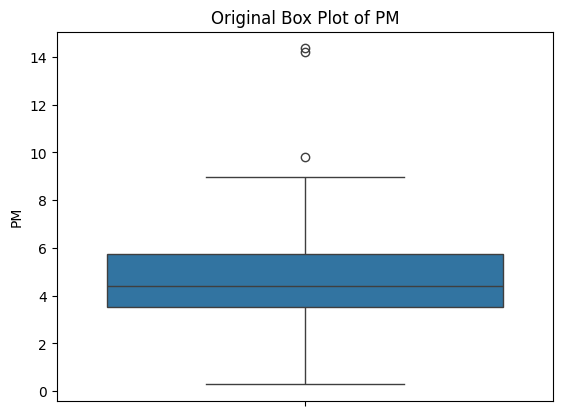

In [ ]:
outlier_finder = pd.DataFrame(data = {'Distance': distance_list, 'PM': pm_list}).sort_values(by = 'Distance')
column = 'PM'
sns.boxplot(outlier_finder['PM'])
plt.title(f'Original Box Plot of {column}')
plt.show()


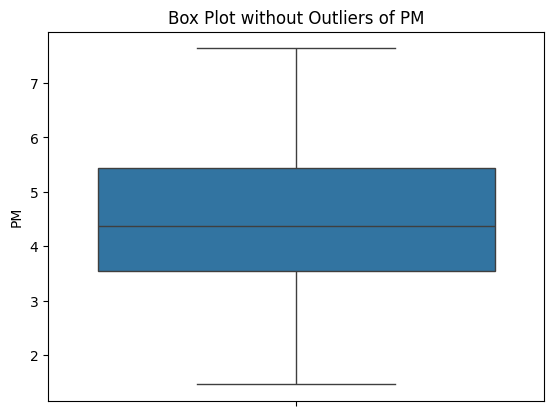

In [ ]:
min = 1.0
max = 8.0
column = 'PM'
removed_outliers = outlier_finder[outlier_finder['PM'] <= max]
removed_outliers = removed_outliers[removed_outliers['PM'] >= min]
 
sns.boxplot(removed_outliers['PM'])
plt.title(f'Box Plot without Outliers of {column}')
plt.show()

In [ ]:
distance_pm_df = pd.DataFrame(data = {'Distance': distance_list, 'PM': pm_list}).sort_values(by = 'Distance')
distance_pm_df = distance_pm_df[distance_pm_df['PM'] <= 7.0] #outlier removal using Box Plot, max is 6.0 to use only the bulk of the data
distance_pm_df = distance_pm_df[distance_pm_df['PM'] >= 1.5] #outlier removal using Box Plot, min is 2.5 to use only the bulk of the data
distance_pm_df = distance_pm_df.reset_index().drop(columns = 'index')

dis_shuffled_df = distance_pm_df.reindex(np.random.permutation(distance_pm_df.index)).reset_index()
pm_shuffled_df = distance_pm_df.reindex(np.random.permutation(distance_pm_df.index)).reset_index()

shuffled_df = pd.DataFrame(data = {'Distance': dis_shuffled_df['Distance'].values, 'PM': pm_shuffled_df['PM'].values})
distance_pm_df = pd.concat([distance_pm_df, shuffled_df], ignore_index = True).sort_values(by = 'Distance').reset_index().drop(columns = 'index')
distance_pm_df



,Distance,PM
0,0.031016,2.5640
1,0.031016,3.9745
2,0.044309,5.1865
3,0.044309,1.9300
4,0.044309,5.1865
...,...,...
127,2.987947,5.8365
128,3.076657,5.4455
129,3.076657,3.0770
130,3.076657,5.8145


<AxesSubplot: xlabel='Distance', ylabel='PM'>

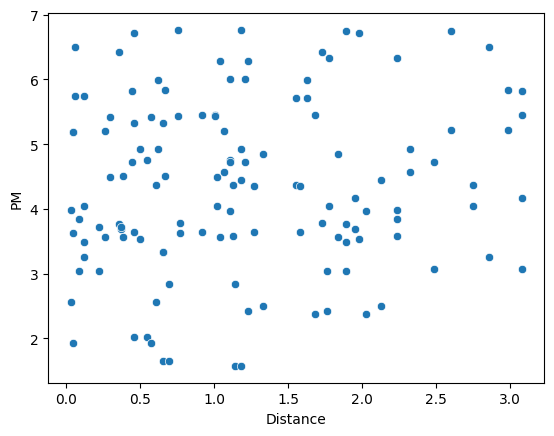

In [ ]:
sns.scatterplot(x = distance_pm_df['Distance'], y = distance_pm_df['PM'])

In [ ]:
x_set = distance_pm_df['Distance']
y_set = distance_pm_df['PM']
X_exp_train, X_overall_test, y_exp_train, y_overall_test = train_test_split(
    x_set, y_set, test_size=0.2, random_state = 1)

def exp_func(x, A, e, b):
    return A*(e**(b*x))
exp_df = pd.DataFrame(data = {'x': X_exp_train.values, 'y': y_exp_train.values})
exp_df = exp_df.sort_values(by = 'x')
exp_guess = [exp_df['y'][0], math.e, 2.0] 
exp_parameters, exp_cov_matrix = curve_fit(exp_func, exp_df['x'], exp_df['y'], p0 = exp_guess)

print("Fitted parameters:", exp_parameters)
print("Covariance matrix:", exp_cov_matrix)

Fitted parameters: [3.95046843 1.86499519 0.08916257]
Covariance matrix: [[ 5.40715150e-02 -4.22214692e+05  3.21595604e+04]
 [-4.22214693e+05  3.29005257e+13 -2.50599236e+12]
 [ 3.21595604e+04 -2.50599236e+12  1.90878339e+11]]


In [ ]:
exponential_errors = np.sqrt(np.diag(exp_cov_matrix))
print("\nFinal Results:")
for i, error in enumerate(exponential_errors):
    print(f"Parameter {i+1}: {exp_parameters[i]} +/- {error}")


Final Results:
Parameter 1: 3.950468431462042 +/- 0.23253282558695015
Parameter 2: 1.8649951891994534 +/- 5735897.983272842
Parameter 3: 0.08916257385427379 +/- 436896.25690390036


In [ ]:
exp_predicted = exp_func(distance_pm_df['Distance'], *exp_parameters)
exp_residuals = distance_pm_df['PM'] - exp_predicted

n = len(distance_pm_df['Distance'])
m = len(exp_parameters)
exp_chi_squared = sum(exp_residuals**2)
exp_reduced_chi_squared = exp_chi_squared / (n - m)

print("Reduced Chi-Squared value of Exponentional Function:", exp_reduced_chi_squared)

Reduced Chi-Squared value of Exponentional Function: 1.7585161455282643


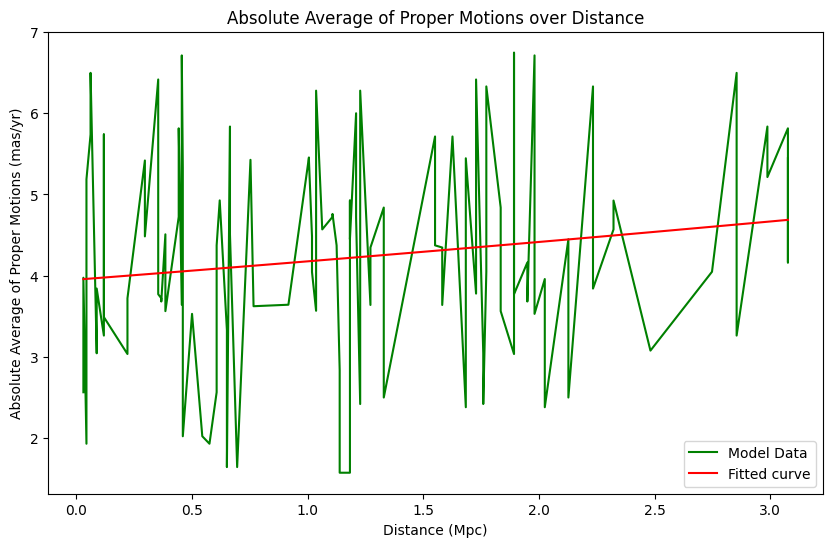

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(exp_df['x'], exp_df['y'], color='green', label='Model Data')
plt.plot(exp_df['x'], exp_func(exp_df['x'], *exp_parameters), color='red', label='Fitted curve')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Absolute Average of Proper Motions (mas/yr)')
plt.title('Absolute Average of Proper Motions over Distance')
plt.legend()
plt.show()

In [ ]:
x_set = distance_pm_df['Distance']
y_set = distance_pm_df['PM']
X_ln_train, X_overall_test, y_ln_train, y_overall_test = train_test_split(
    x_set, y_set, test_size=0.2, random_state = 2)
ln_df = pd.DataFrame(data = {'x': X_ln_train.values, 'y': y_ln_train.values})
ln_df = ln_df.sort_values(by = 'x')

def ln_func(x, h, k):
    return np.log(x + h) + k

ln_guess = [ln_df['x'][0], ln_df['y'][0]] 
ln_parameters, ln_cov_matrix = curve_fit(ln_func, ln_df['x'], ln_df['y'], p0 = ln_guess)

print("Fitted parameters:", ln_parameters)
print("Covariance matrix:", ln_cov_matrix)

Fitted parameters: [4.09474884 2.77974148]
Covariance matrix: [[20.62522108 -3.94640594]
 [-3.94640594  0.77183953]]


In [ ]:
ln_errors = np.sqrt(np.diag(ln_cov_matrix))
print("\nFinal Results:")
for i, error in enumerate(ln_errors):
    print(f"Parameter {i+1}: {ln_parameters[i]} +/- {error}")


Final Results:
Parameter 1: 4.094748836235355 +/- 4.5414998708160015
Parameter 2: 2.7797414844280213 +/- 0.8785439857359955


In [ ]:
ln_predicted = ln_func(distance_pm_df['Distance'], *ln_parameters)
ln_residuals = distance_pm_df['PM'] - ln_predicted

n = len(distance_pm_df['Distance'])
m = len(ln_parameters)
ln_chi_squared = sum(ln_residuals**2)
ln_reduced_chi_squared = ln_chi_squared / (n - m)

print("Reduced Chi-Squared value of Log Function:", ln_reduced_chi_squared)

Reduced Chi-Squared value of Log Function: 1.7382918595077297


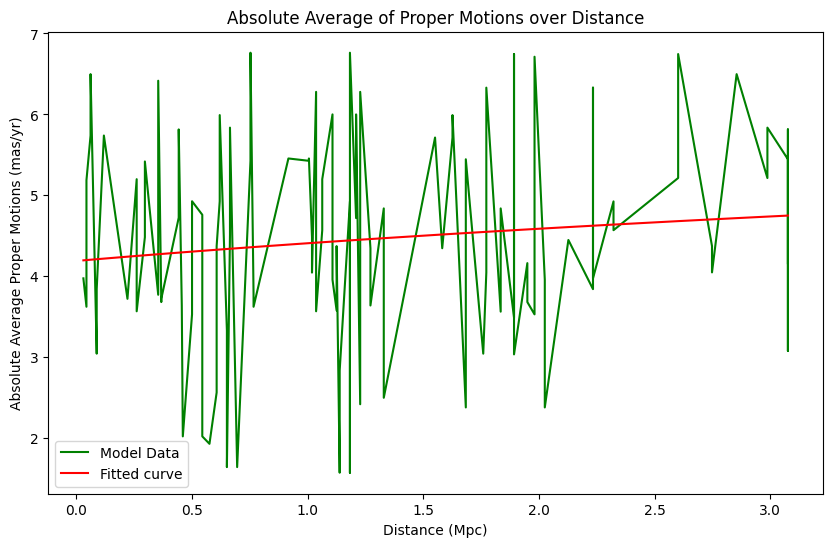

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ln_df['x'], ln_df['y'], color='green', label='Model Data')
plt.plot(ln_df['x'], ln_func(ln_df['x'], *ln_parameters), color='red', label='Fitted curve')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Absolute Average Proper Motions (mas/yr)')
plt.title('Absolute Average of Proper Motions over Distance')
plt.legend()
plt.show()

In [ ]:
x_set = distance_pm_df['Distance']
y_set = distance_pm_df['PM']
X_linear_train, X_overall_test, y_linear_train, y_overall_test = train_test_split(
    x_set, y_set, test_size=0.2, random_state = 3)
linear_df = pd.DataFrame(data = {'x': X_linear_train.values, 'y': y_linear_train.values})
linear_df = linear_df.sort_values(by = 'x')

def linear_func(x, B, h, k):
    return B*(x - h) + k

linear_guess = [2.0, linear_df['x'][0], linear_df['y'][0]] 
linear_parameters, linear_cov_matrix = curve_fit(linear_func, linear_df['x'], linear_df['y'], p0 = linear_guess)

print("Fitted parameters:", linear_parameters)
print("Covariance matrix:", linear_cov_matrix)

Fitted parameters: [0.1222663  6.09670196 4.98340076]
Covariance matrix: [[ 2.67814570e-02 -9.94666749e+04 -1.21612916e+04]
 [-9.94666839e+04  7.27862060e+14  8.89930010e+13]
 [-1.21612924e+04  8.89930010e+13  1.08808450e+13]]


In [ ]:
linear_errors = np.sqrt(np.diag(linear_cov_matrix))
print("\nFinal Results:")
for i, error in enumerate(linear_errors):
    print(f"Parameter {i+1}: {linear_parameters[i]} +/- {error}")


Final Results:
Parameter 1: 0.12226630153208562 +/- 0.16365041084902235
Parameter 2: 6.096701956655276 +/- 26978918.80305215
Parameter 3: 4.983400761949726 +/- 3298612.5828962987


In [ ]:
linear_predicted = linear_func(distance_pm_df['Distance'], *linear_parameters)
linear_residuals = distance_pm_df['PM'] - linear_predicted

n = len(distance_pm_df['Distance'])
m = len(linear_parameters)
linear_chi_squared = sum(linear_residuals**2)
linear_reduced_chi_squared = linear_chi_squared / (n - m)

print("Reduced Chi-Squared value of Linear Function:", linear_reduced_chi_squared)

Reduced Chi-Squared value of Linear Function: 1.7451788970723874


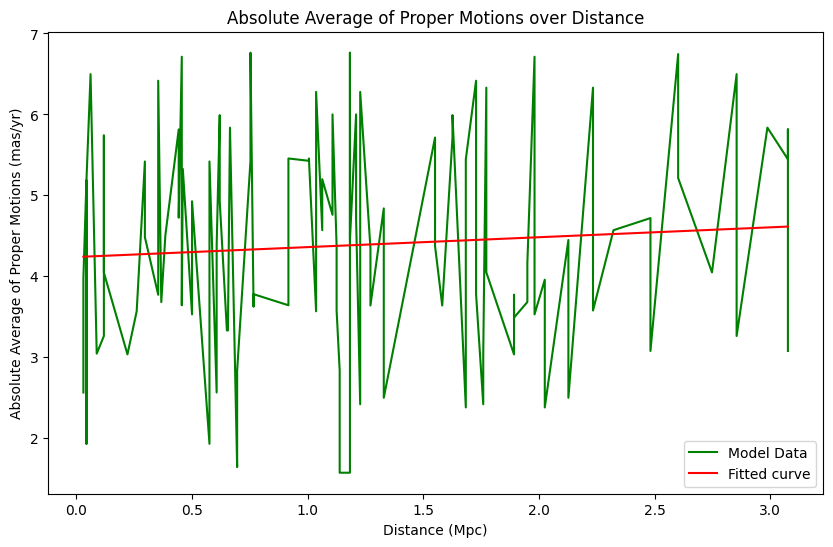

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(linear_df['x'], linear_df['y'], color='green', label='Model Data')
plt.plot(linear_df['x'], linear_func(linear_df['x'], *linear_parameters), color='red', label='Fitted curve')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Absolute Average of Proper Motions (mas/yr)')
plt.title('Absolute Average of Proper Motions over Distance')
plt.legend()
plt.show()

In [ ]:
x_set = distance_pm_df['Distance']
y_set = distance_pm_df['PM']
X_sin_train, X_overall_test, y_sin_train, y_overall_test = train_test_split(
    x_set, y_set, test_size=0.2, random_state = 4)
sin_df = pd.DataFrame(data = {'x': X_sin_train.values, 'y': y_sin_train.values})
sin_df = sin_df.sort_values(by = 'x')
def sin_func(x, a, b, c, d):
    return -a * np.sin(b * x + c) + d

sin_guess = [16, 0.1, np.pi, sin_df['y'][0]] 
sin_parameters, sin_cov_matrix = curve_fit(sin_func, sin_df['x'], sin_df['y'], p0 = sin_guess)

print("Fitted parameters:", sin_parameters)
print("Covariance matrix:", sin_cov_matrix)

Fitted parameters: [ 3.78496608e+01  4.69161948e-03  3.26612391e+00 -5.55905068e-01]
Covariance matrix: [[ 2.71117049e+13 -3.29491331e+09  9.64144433e+10 -6.98781550e+12]
 [-3.29491326e+09  4.00434257e+05 -1.17172353e+07  8.49232209e+08]
 [ 9.64145239e+10 -1.17172453e+07  3.43047384e+08 -2.48567615e+10]
 [-6.98781853e+12  8.49232590e+08 -2.48567515e+10  1.80130471e+12]]


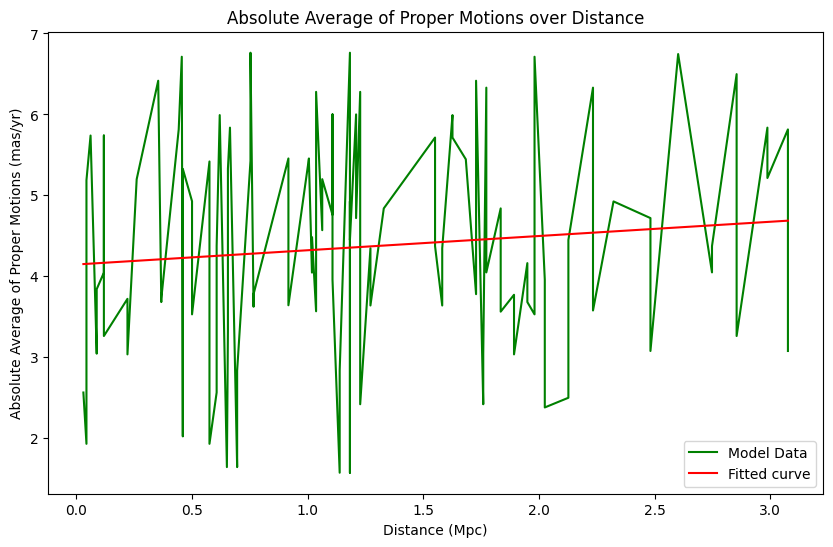

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sin_df['x'], sin_df['y'], color='green', label='Model Data')
plt.plot(sin_df['x'], sin_func(sin_df['x'], *sin_parameters), color='red', label='Fitted curve')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Absolute Average of Proper Motions (mas/yr)')
plt.title('Absolute Average of Proper Motions over Distance')
plt.legend()
plt.show()

In [ ]:
sin_predicted = sin_func(distance_pm_df['Distance'], *sin_parameters)
sin_residuals = distance_pm_df['PM'] - sin_predicted

n = len(distance_pm_df['Distance'])
m = len(sin_parameters)
sin_chi_squared = sum(sin_residuals**2)
sin_reduced_chi_squared = sin_chi_squared / (n - m)

print("Reduced Chi-Squared value of Sine Function:", sin_reduced_chi_squared)

Reduced Chi-Squared value of Sine Function: 1.755759664923156


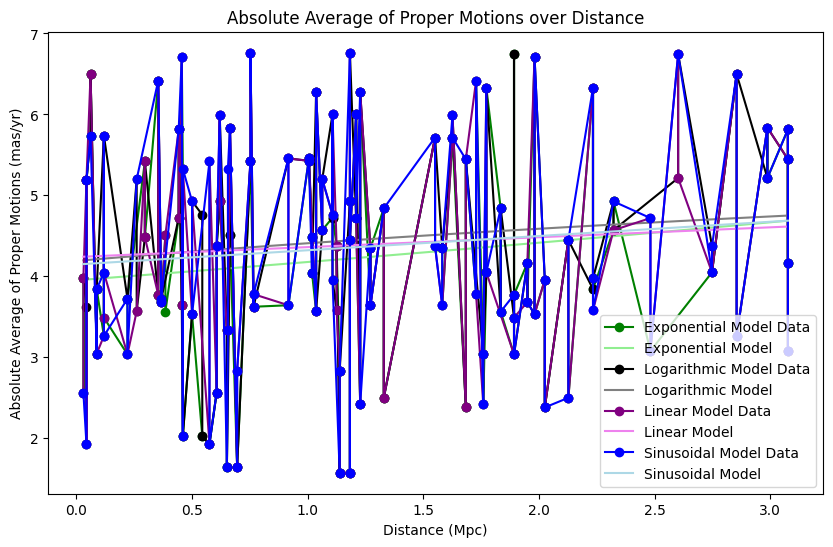

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(exp_df['x'], exp_df['y'], color='green', label='Exponential Model Data', marker = 'o')
plt.plot(exp_df['x'], exp_func(exp_df['x'], *exp_parameters), color='lightgreen', label='Exponential Model')
plt.plot(ln_df['x'], ln_df['y'], color='black', label='Logarithmic Model Data', marker = 'o')
plt.plot(ln_df['x'], ln_func(ln_df['x'], *ln_parameters), color='grey', label='Logarithmic Model')
plt.plot(linear_df['x'], linear_df['y'], color='purple', label='Linear Model Data', marker = 'o')
plt.plot(linear_df['x'], linear_func(linear_df['x'], *linear_parameters), color='violet', label='Linear Model')
plt.plot(sin_df['x'], sin_df['y'], color='blue', label='Sinusoidal Model Data', marker = 'o')
plt.plot(sin_df['x'], sin_func(sin_df['x'], *sin_parameters), color='lightblue', label='Sinusoidal Model')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Absolute Average of Proper Motions (mas/yr)')
plt.title('Absolute Average of Proper Motions over Distance')
plt.legend()
plt.show()

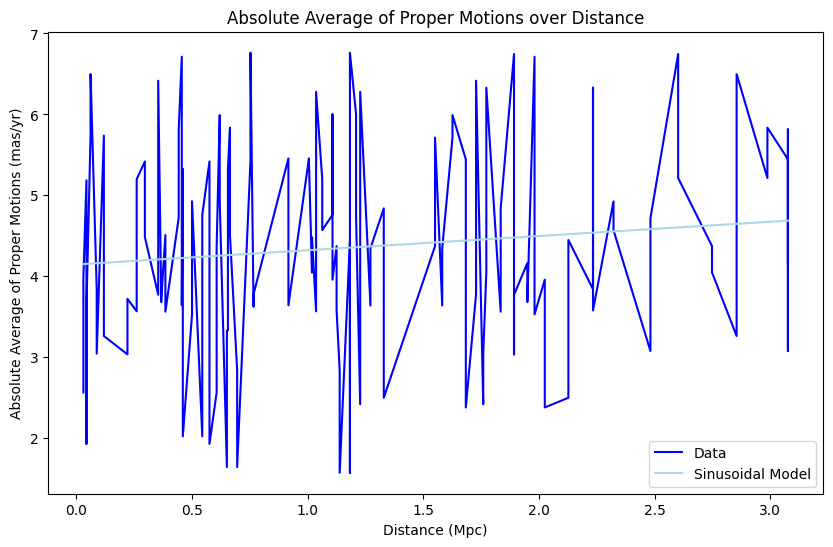

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(distance_pm_df['Distance'], distance_pm_df['PM'], color='blue', label='Data')
#plt.plot(exp_df['x'], exp_func(exp_df['x'], *exp_parameters), color='lightgreen', label='Exponential Model')
#plt.plot(ln_df['x'], ln_func(ln_df['x'], *ln_parameters), color='grey', label='Logarithmic Model')
#plt.plot(linear_df['x'], linear_func(linear_df['x'], *linear_parameters), color='violet', label='Linear Model')
plt.plot(sin_df['x'], sin_func(sin_df['x'], *sin_parameters), color='lightblue', label='Sinusoidal Model')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Absolute Average of Proper Motions (mas/yr)')
plt.title('Absolute Average of Proper Motions over Distance')
plt.legend()
plt.show()

In [ ]:
chi_list = [exp_reduced_chi_squared, ln_reduced_chi_squared, linear_reduced_chi_squared, sin_reduced_chi_squared]
chi_name_list = ['Exponential', 'Logarithmic', 'Linear', 'Sinusoidal']
print("All Chi-Squared values:")
print("Reduced Chi-Squared value of Exponentional Function:", exp_reduced_chi_squared)
print("Reduced Chi-Squared value of Logarithmic Function:", ln_reduced_chi_squared)
print("Reduced Chi-Squared value of Linear Function:", linear_reduced_chi_squared)
print("Reduced Chi-Squared value of Sine Function:", sin_reduced_chi_squared)
for i in range(len(chi_list)):
    if chi_list[i] == reduce(lambda x, y: x if float(x) < float(y) else y, chi_list):
        print(f"The best model for the data is the {chi_name_list[i]} Model as it has the lowest Reduced Chi-Squared value.")

All Chi-Squared values:
Reduced Chi-Squared value of Exponentional Function: 1.7585161455282643
Reduced Chi-Squared value of Logarithmic Function: 1.7382918595077297
Reduced Chi-Squared value of Linear Function: 1.7451788970723874
Reduced Chi-Squared value of Sine Function: 1.755759664923156
The best model for the data is the Logarithmic Model as it has the lowest Reduced Chi-Squared value.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff78fdd2-67f1-43fe-8ef0-3e8260749a8d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>